# Titanic Dataset Prediction Model

In [1]:
from google.colab import drive
from google.colab import files

drive.mount("/content/gdrive")  
!pwd  # show current path 

Mounted at /content/gdrive
/content


## Ubicar folder con la base de datos del conjunto de entrenamiento


In [2]:
%cd "/content/gdrive/Shareddrives/Equipo Concentración AI/Titanic"
!ls  # show current directory

/content/gdrive/Shareddrives/Equipo Concentración AI/Titanic
export.csv  RetoIA-Titanic.gslides  Reto_Titanic.ipynb	test.csv  train.csv


## Importar librerías

In [3]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns


## Análisis exploratorio de datos (EDA)

Leer base de datos

In [4]:
train = pd.read_csv('train.csv')
titanic = train.copy()
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Estadística descriptiva para un análisis general

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Total de pasajeros por clase

In [7]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Total de personas por sexo

In [8]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64




Total de personas que sobrevivieron por sexo

In [9]:
titanic.groupby(by ='Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

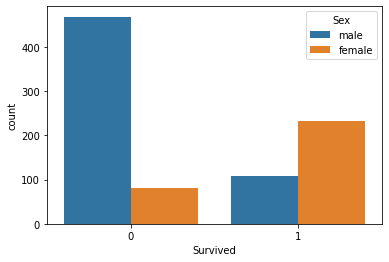

In [10]:
sns.countplot(x="Survived", hue="Sex", data=titanic)

## Datos de los sobrevivientes

In [11]:
survivors = titanic[titanic['Survived']==1]
titanic[titanic['Survived']==1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


### Distribución de las edades

Text(0.5, 0, 'Age (in Years)')

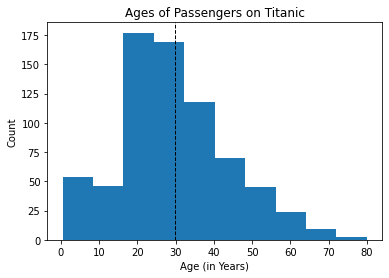

In [12]:
plt.hist(titanic.Age)
plt.axvline(titanic.Age.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Ages of Passengers on Titanic')
plt.ylabel('Count')
plt.xlabel('Age (in Years)')

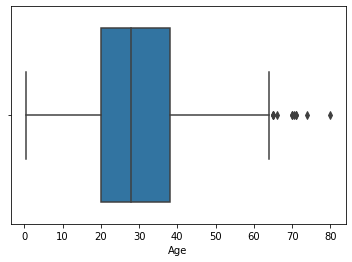

In [13]:
sns.boxplot(x='Age', data=titanic)

### Promedio de edades

In [14]:
titanic['Age'].mean()

29.69911764705882

## Distribución del costo del boleto

Text(0.5, 0, 'Fare (in Dollars)')

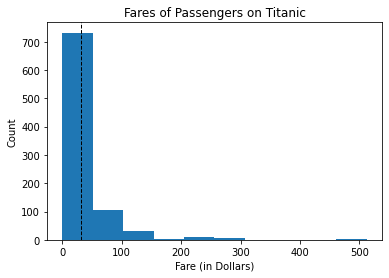

In [15]:
plt.hist(titanic.Fare)
plt.axvline(titanic.Fare.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title('Fares of Passengers on Titanic')
plt.ylabel('Count')
plt.xlabel('Fare (in Dollars)')

## Promedio de los datos de los sobrevivientes por columna


In [16]:
titanic.groupby(by='Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


## Correlación de las variables

Utilizamos variables dummy para analizar la columna de sexo ya que no tiene valor numérico.


### Correlación entre sexo y sobrevivientes

In [17]:
titanic['Sex'].str.get_dummies().corrwith(titanic['Survived']/titanic['Survived'].max())

female    0.543351
male     -0.543351
dtype: float64

Como se observó anteriormente en las gráficas y ahora con esta prueba, se puede asumir que ser un hombre en el titanic está correlacionado negativamente con su supervivencia.

Como la columna "passengerId" no tiene una correlación relevante con otra columna en la primera matriz de correlación que generamos, se decidió removerla para no tener datos innecesarios.

In [18]:
titanic = titanic.drop(['PassengerId'], axis=1)

Matriz de correlación para visualizar todas las correlaciones.

Text(0.5, 1.0, 'Correlation matrix for the titanic dataset')

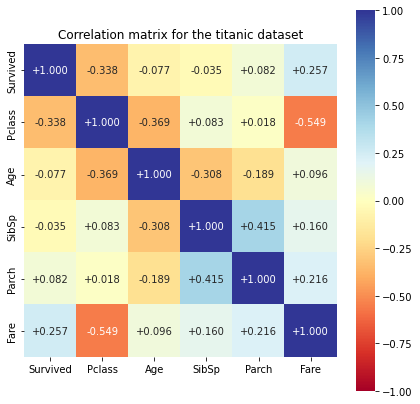

In [19]:
plt.figure(figsize=(7,7))
sns.heatmap(titanic.corr(), cmap="RdYlBu", 
    annot=True, square=True,
    vmin=-1, vmax=1, fmt="+.3f")
plt.title("Correlation matrix for the titanic dataset")

Las columnas no numéricas (como 'Sex') no aparecen en la matriz, así que es necesario convertir sus datos para poder visualizarlas.

Text(0.5, 1.0, 'Correlation matrix for the titanic dataset')

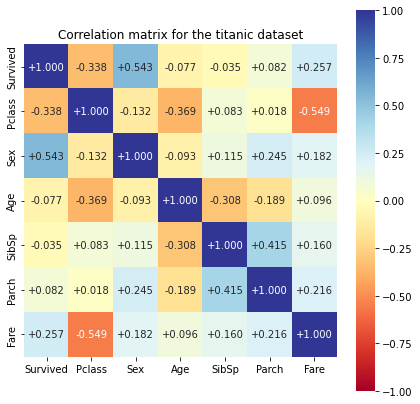

In [20]:
titanic['Sex'] = titanic['Sex'].map({"male":0,"female":1})

plt.figure(figsize=(7,7))
sns.heatmap(titanic.corr(), cmap="RdYlBu", 
    annot=True, square=True,
    vmin=-1, vmax=1, fmt="+.3f")
plt.title("Correlation matrix for the titanic dataset")

Se puede observar una correlación negativa relevante entre 'Pclass' y 'Fare', la cual se puede interpretar como a mayor clase(menor numero) mayor costo del boleto.
Los boletos de primera clase son más caros.

# Mujeres y niños vs Hombres

In [21]:
women_and_children = titanic[(titanic['Sex'] == 1) | (titanic['Age'] < 16)]
w_a_c_survival_rate = women_and_children['Survived'].value_counts(normalize=True) * 100
w_a_c_survival_rate

1    71.751412
0    28.248588
Name: Survived, dtype: float64

Se puede ver que los niños y las mujeres tienen 71% probabilidad de sobrevivir.

In [22]:
adult_men = titanic[(titanic['Sex']==0) & (titanic['Age'] > 16)]
a_m_survival_rate = adult_men['Survived'].value_counts(normalize=True) * 100
a_m_survival_rate

0    82.338308
1    17.661692
Name: Survived, dtype: float64

En cuanto a los hombres, ellos solo tienen 17% probabilidad de sobrevivir.


# Limpieza de la base de datos.

### Checar valores nulos

In [23]:
dataset = pd.concat([titanic], sort=False).drop(columns='Survived')
pd.DataFrame({'No. NaN': dataset.isna().sum(), '%': dataset.isna().sum() / len(dataset)})

,No. NaN,%
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,177,0.198653
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,0,0.000000
Cabin,687,0.771044
Embarked,2,0.002245


Añadir la base de datos 'Test' para entrenar las edades.


In [24]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [25]:
dataset = pd.concat([test], sort=False)
pd.DataFrame({'No. NaN': dataset.isna().sum(), '%': dataset.isna().sum() / len(dataset)})

,No. NaN,%
PassengerId,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
Age,86,0.205742
SibSp,0,0.000000
Parch,0,0.000000
Ticket,0,0.000000
Fare,1,0.002392
Cabin,327,0.782297


Solo es una fila en fare, llenamos con el promedio

In [26]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

Para nuestro modelo que debemos generar para combinar age groups, podemos utilizar tambien la dataframe de test que se sube como validacion a Kaggle porque estos tambien son una buena cantidad de datos que podemos usar para entrenar a nuestro modelo para predecir ageGroup. Por lo tanto hacemos una dataframe combinada y la limpiamos igualmente

In [27]:
bothDf = pd.concat([train,test],axis=0)
bothDf.shape

(1309, 12)

In [28]:
bothDf['Sex'] = bothDf['Sex'].map({"male":0,"female":1}).copy()
bothDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [29]:
bothDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [30]:
bothDf.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",0,NaN,1,1,2668,22.3583,NaN,C


La cabina la cambiaremos a hasCabin el cual es un booleano que nos muestra si tuvo o no cabina. Esto es para tener un poco mas de datos y poder utilizar la columna como informacion viable. Para esto aplicamos una lambda function y droppeamos cabin 

In [31]:
bothDf['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
titanic['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

bothDf = bothDf.drop(["Cabin"],axis = 1)
titanic = titanic.drop(["Cabin"],axis = 1)

In [32]:
bothDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0


In [33]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,0.0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,0.0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0.0


Como se muestra anteriormente, hemos transformado la columna de "Cabin" a "Has_Cabin" con la finalidad de convertir esta columna en información util para nuestro modelo. 

En este caso la importancia no esta en el numero de identificacion de la cabina que los pasajeros tuvieran sino mas bien basta con tan solo saber si tenían o no cabina para poder utilizar esta informacion.

Se sabe que aquellas personas con mejores poderes adquisitivos contaban con cabinas, el saber si contaban con una cabina o no podria ser relevante para el modelo a desarrollar.

Edad es la segunda columna con el mayor número de valores nulos, en este caso generaremos un modelo para predecir los valores faltantes de dicha columna. Se sabe que la edad es un factor importante para el modelo por la forma en la que se distribuian y organizaban los botes de rescate, entre sus formas de subir a las personas a los botes estaba el que primero se subian las personas menores (bebes) y mayores de edad.

Dividiremos aleatoriamente la base de datos sin valores nulos entre un conjunto de entrenamiento y un conjunto de prueba( 70%,30%).

Primero para dividir los agegroups y hacer el modelo, juntar las edades en n numero de grupos. Usaremos k means para obtener los rangos de los grupos de las edades para tener el mejor agrupamiento posible. Aqui tratamos con 1 a 14 clusters y usamos el metodo del codo para determinar el numero ideal de ageGroups.

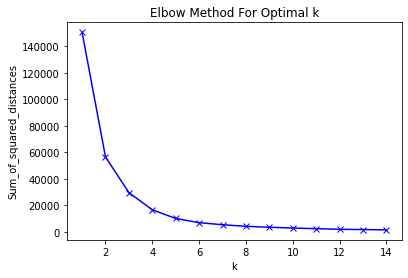

In [34]:
from sklearn.cluster import KMeans
#For clusters only use train data
X = titanic[[ 'Age', 'Survived']].dropna()

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Podemos ver que nuestro numero de clusters optimo esta entre tres y cuatro. Optamos por cuatro para ser mejor medida.

### Determinar los grupos de edades

Ya que sabemos que deben ser 4 grupos, utilizamos estas funciones de numpy en conjunto con Kmeans para seleccionar los mejores grupos. 

In [35]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
X['AgeGroup'] = kmeans.labels_

margin = 0.01
x_min, x_max = X['Age'].min() - margin, X['Age'].max() + margin
y_min, y_max = X['Survived'].min() - margin, X['Survived'].max() + margin
xRange, yRange = np.meshgrid(np.arange(x_min, x_max, margin), np.arange(y_min, y_max, margin))
Z = kmeans.predict(np.c_[xRange.ravel(), yRange.ravel()]).reshape(xRange.shape)

ageGroups = []
for k in range(4):
    ageGroups.append(xRange[Z==k].min())

ageGroups.sort()
ageGroups[0] = 0
ageGroups.append(float('inf'))
ageGroups = np.array(ageGroups)
print(ageGroups)

[ 0.   13.16 27.67 43.52   inf]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


Ya con nuestros agegroups, utilizamos pd.cut para asignarlos a todas las rows

In [36]:
#TENEMOS LOS AGE GROUPS Y ASIGNAMOS
titanic['AgeGroup'] = pd.cut(titanic['Age'], ageGroups, labels=['age1','age2','age3','age4'])
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin,AgeGroup
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0.0,age2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,0.0,age3
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0,age2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,0.0,age3
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0.0,age3


In [37]:
#TENEMOS LOS AGE GROUPS Y ASIGNAMOS
bothDf['AgeGroup'] = pd.cut(bothDf['Age'], ageGroups, labels=['age1','age2','age3','age4'])
bothDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Has_Cabin,AgeGroup
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,0,age2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,1,age3
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,0,age2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,1,age3
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,0,age3


Igualmente 4 clusters

Preparación de datos para agrupar las edades.

Hacemos limpieza de datos ya que ya vamos a empezar a tratar los datos para el modelo de ageGroups, para esto utilizaremos dummies en las categoricas relevantes y droppearemos las no relevantes.

In [38]:
clean = bothDf.drop(['Embarked','Ticket','Name'],axis=1)
dummy = pd.get_dummies(bothDf['Embarked'],prefix="emb")
bothDf = pd.concat([clean,dummy],axis=1)
bothDf.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Has_Cabin,AgeGroup,emb_C,emb_Q,emb_S
0,1,0.0,3,0,22.0,1,0,7.2500,0,age2,0,0,1
1,2,1.0,1,1,38.0,1,0,71.2833,1,age3,1,0,0
2,3,1.0,3,1,26.0,0,0,7.9250,0,age2,0,0,1
3,4,1.0,1,1,35.0,1,0,53.1000,1,age3,0,0,1
4,5,0.0,3,0,35.0,0,0,8.0500,0,age3,0,0,1


Para entrenar a nuestro modelo solo nos importan las que si tienen edades asi que separamos ambas de nuestro dataset que tiene el train + test de kaggle

In [39]:
withAgesFilled = bothDf[bothDf['Age'].isnull()==False]
withoutAgesFilled = bothDf[bothDf['Age'].isnull()==True]

In [40]:
withAgesFilled.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Has_Cabin,AgeGroup,emb_C,emb_Q,emb_S
0,1,0.0,3,0,22.0,1,0,7.2500,0,age2,0,0,1
1,2,1.0,1,1,38.0,1,0,71.2833,1,age3,1,0,0
2,3,1.0,3,1,26.0,0,0,7.9250,0,age2,0,0,1
3,4,1.0,1,1,35.0,1,0,53.1000,1,age3,0,0,1
4,5,0.0,3,0,35.0,0,0,8.0500,0,age3,0,0,1


In [41]:
withoutAgesFilled.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Has_Cabin,AgeGroup,emb_C,emb_Q,emb_S
5,6,0.0,3,0,NaN,0,0,8.4583,0,NaN,0,1,0
17,18,1.0,2,0,NaN,0,0,13.0000,0,NaN,0,0,1
19,20,1.0,3,1,NaN,0,0,7.2250,0,NaN,1,0,0
26,27,0.0,3,0,NaN,0,0,7.2250,0,NaN,1,0,0
28,29,1.0,3,1,NaN,0,0,7.8792,0,NaN,0,1,0


Empezamos a entrenar nuestro modelo para los ageGroups, utilizamos tal tal tal factor. Y random state para ser consistentes. Spliteamos 70-30 porqueee...

   Pclass  Sex   Age  SibSp  Parch     Fare  Has_Cabin  emb_C  emb_Q  emb_S
0       3    0  22.0      1      0   7.2500          0      0      0      1
1       1    1  38.0      1      0  71.2833          1      1      0      0
2       3    1  26.0      0      0   7.9250          0      0      0      1
3       1    1  35.0      1      0  53.1000          1      0      0      1
4       3    0  35.0      0      0   8.0500          0      0      0      1
  AgeGroup
0     age2
1     age3
2     age2
3     age3
4     age3


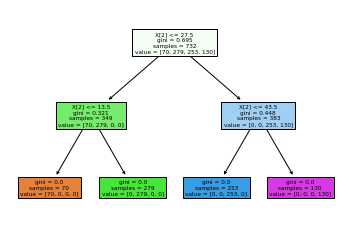

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

#CLEAN TITANIC DF WITH ONLY NUMERIC / CATEGORICAL ORDINAL VALUES
x = withAgesFilled.drop(['PassengerId','Survived','AgeGroup'],axis=1)
y = withAgesFilled[['AgeGroup']]

print(x.head())
print(y.head())

#We want as much data feeding into the algorithm
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

ageClassifier = DecisionTreeClassifier(random_state=42)
ageClassifier.fit(x_train, y_train)

tree.plot_tree(ageClassifier, filled=True)
plt.show()

Vemos que tenemos un decision tree muy sencillo lo cual parece ser bueno

In [43]:
y_pred = ageClassifier.predict(x_train)

print(confusion_matrix(y_train, y_pred))
print(accuracy_score(y_train,y_pred))

y_pred = ageClassifier.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))


[[ 70   0   0   0]
 [  0 279   0   0]
 [  0   0 253   0]
 [  0   0   0 130]]
1.0
[[ 29   0   0   0]
 [  0 126   0   0]
 [  0   0 103   0]
 [  0   0   0  56]]
1.0


100% en agegroups esto es muy bueno porque es en tanto el train y el test. Significa que no tenemos sobreajuste.

In [44]:
xNoAge = withoutAgesFilled.drop(['Survived','Age','AgeGroup'],axis=1)
xNoAge.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Has_Cabin,emb_C,emb_Q,emb_S
5,6,3,0,0,0,8.4583,0,0,1,0
17,18,2,0,0,0,13.0000,0,0,0,1
19,20,3,1,0,0,7.2250,0,1,0,0
26,27,3,0,0,0,7.2250,0,1,0,0
28,29,3,1,0,0,7.8792,0,0,1,0


### Predicción de los grupos de edades para las dos bases de datos.

Ahora que tenemos el modelo entrenado, vamos ahora a predecir el ageGroup para los datos que no tienen edad, para esto no podemos medir que tan bueno es el modelo ya que son datos que no existen. La validacion del modelo tendra que ser solo con nuestro training/validation.

In [45]:
yAges = pd.DataFrame(ageClassifier.predict(xNoAge), columns=['AgeGroup'])

yAges.reset_index(drop=True, inplace=True)
withoutAgesFilled.reset_index(drop=True, inplace=True)

withoutAgesFilled['AgeGroup'] = yAges

allAgeGroupsBothDfs = pd.concat([withAgesFilled,withoutAgesFilled],axis=0)
allAgeGroupsBothDfs.head()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- PassengerId
Feature names seen at fit time, yet now missing:
- Age

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Has_Cabin,AgeGroup,emb_C,emb_Q,emb_S
0,1,0.0,3,0,22.0,1,0,7.2500,0,age2,0,0,1
1,2,1.0,1,1,38.0,1,0,71.2833,1,age3,1,0,0
2,3,1.0,3,1,26.0,0,0,7.9250,0,age2,0,0,1
3,4,1.0,1,1,35.0,1,0,53.1000,1,age3,0,0,1
4,5,0.0,3,0,35.0,0,0,8.0500,0,age3,0,0,1


Convertimos nuestra variable categorica ageGroups a dummy, esto para poder hacer entrenamiento a nuestro modelo. Otra alternativa que consideramos pero no utilizamos seria usar una categorica nominal (1-4) para modelar las edades ya que estas si se pueden ordenar incluso en ageGroups.

In [46]:
dummyAge = pd.get_dummies(allAgeGroupsBothDfs['AgeGroup'],prefix="ag-")
allAgeGroupsBothDfs = pd.concat([allAgeGroupsBothDfs,dummyAge],axis=1).drop(['AgeGroup','Age'],axis=1)
allAgeGroupsBothDfs.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Has_Cabin,emb_C,emb_Q,emb_S,ag-_age1,ag-_age2,ag-_age3,ag-_age4
0,1,0.0,3,0,1,0,7.2500,0,0,0,1,0,1,0,0
1,2,1.0,1,1,1,0,71.2833,1,1,0,0,0,0,1,0
2,3,1.0,3,1,0,0,7.9250,0,0,0,1,0,1,0,0
3,4,1.0,1,1,1,0,53.1000,1,0,0,1,0,0,1,0
4,5,0.0,3,0,0,0,8.0500,0,0,0,1,0,0,1,0


Ya con todos los datos limpios y con ageGroup predicha, los volvemos a separar mediante el PassengerId de cada una de los datasets (train.csv, test.csv), esto con la finalidad de tener toda la informacion limpia de una pero tambien poder entregar a Kaggle nuestras predicciones.

In [47]:
#SPLIT CLEANED DF TO BOTH TRAIN AND TEST
train = train[["PassengerId"]].join(allAgeGroupsBothDfs.set_index('PassengerId'),on='PassengerId',lsuffix='sss')
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Has_Cabin,emb_C,emb_Q,emb_S,ag-_age1,ag-_age2,ag-_age3,ag-_age4
0,1,0.0,3,0,1,0,7.2500,0,0,0,1,0,1,0,0
1,2,1.0,1,1,1,0,71.2833,1,1,0,0,0,0,1,0
2,3,1.0,3,1,0,0,7.9250,0,0,0,1,0,1,0,0
3,4,1.0,1,1,1,0,53.1000,1,0,0,1,0,0,1,0
4,5,0.0,3,0,0,0,8.0500,0,0,0,1,0,0,1,0


In [48]:
#SPLIT CLEANED DF TO BOTH TRAIN AND TEST
test = test[["PassengerId"]].join(allAgeGroupsBothDfs.set_index('PassengerId'),on='PassengerId',lsuffix='sss')
test.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Has_Cabin,emb_C,emb_Q,emb_S,ag-_age1,ag-_age2,ag-_age3,ag-_age4
0,892,NaN,3,0,0,0,7.8292,0,0,1,0,0,0,1,0
1,893,NaN,3,1,1,0,7.0000,1,0,0,1,0,0,0,1
2,894,NaN,2,0,0,0,9.6875,0,0,1,0,0,0,0,1
3,895,NaN,3,0,0,0,8.6625,1,0,0,1,0,1,0,0
4,896,NaN,3,1,1,1,12.2875,0,0,0,1,0,1,0,0


# MODELO SOBREVIVIR

Finalmente, nos movemos a realizar el modelo de si sobrevivio o no. 

In [49]:
forModelx = train.drop(['PassengerId','Survived'],axis=1)
print(forModelx.head())

forModely = train['Survived']
print(forModely.head())

print(forModelx.shape,forModely.shape)

   Pclass  Sex  SibSp  Parch     Fare  Has_Cabin  emb_C  emb_Q  emb_S  \
0       3    0      1      0   7.2500          0      0      0      1   
1       1    1      1      0  71.2833          1      1      0      0   
2       3    1      0      0   7.9250          0      0      0      1   
3       1    1      1      0  53.1000          1      0      0      1   
4       3    0      0      0   8.0500          0      0      0      1   

   ag-_age1  ag-_age2  ag-_age3  ag-_age4  
0         0         1         0         0  
1         0         0         1         0  
2         0         1         0         0  
3         0         0         1         0  
4         0         0         1         0  
0    0.0
1    1.0
2    1.0
3    1.0
4    0.0
Name: Survived, dtype: float64
(891, 13) (891,)


Igualmente spliteamos para entrenar 

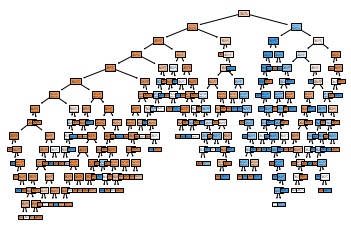

In [50]:
x_train, x_test, y_train, y_test = train_test_split(forModelx,forModely,test_size=0.3,random_state=42)

survivedOrNot = DecisionTreeClassifier(random_state=42)
survivedOrNot.fit(x_train, y_train)

tree.plot_tree(survivedOrNot,filled=True)
plt.show()

Vemos que nuestro arbol es mucho mas complejo debido a la cantidad de datos y factores que se toman en cuenta. Incluso cuando el output solo es 0 y 1 para tener una buena prediccion es necesario tener un arbol tan grande.

In [51]:
y_pred = survivedOrNot.predict(x_train)

print(confusion_matrix(y_train, y_pred))
print(accuracy_score(y_train,y_pred))

y_pred = survivedOrNot.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[387   5]
 [ 21 210]]
0.9582664526484751
[[127  30]
 [ 35  76]]
0.7574626865671642


Con nuestro modelo por default de DTC vemos que tenemos 96% de accuracy en nuestro modelo con el training, sin embargo es solo 75% para los de prueba. Esto puede ser indicacion de sobreajuste. Analizaremos mas esto a continuacion

Probaremos ahora lo mismo pero con kmeans nearest neighbor a ver si tenemos mejor accuracy

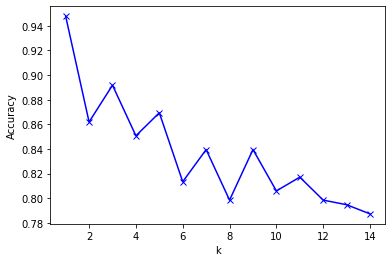

In [52]:
K = range(1,15)
scores = []
for k in K:
    km = KNeighborsClassifier(n_neighbors=k)
    km = km.fit(forModelx,forModely)
    y_pred = km.predict(x_test)
    scores.append(accuracy_score(y_test,y_pred))
    
plt.plot(K, scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

En este caso k en 1 tiene el accuracy mas alto.

In [53]:
km = KNeighborsClassifier(n_neighbors=1)
km = km.fit(forModelx,forModely)


y_pred = km.predict(x_train)

print(confusion_matrix(y_train, y_pred))
print(accuracy_score(y_train,y_pred))

y_pred = km.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[372  20]
 [ 17 214]]
0.9406099518459069
[[153   4]
 [ 10 101]]
0.9477611940298507


Nos da alto, sin embargo, parece que en nuestros sets de test tiene overfit. Ya que cuando entregamos a Kaggle nos da la calificacion mas baja hasta ahora. Esto puede ser por condicionamiento del training, por lo tanto seguiremos probando mas modelos.

Nuestro modelo de Kmeans resulta tener un rendimiento regular, al realizar pruebas en kaggle la precisión es muy baja lo que indica sobreajuste por lo tanto no lo vamos a considerar siguiendo este analisis.

Tenemos peor accuracy, tratamos finalmente otro modelo

Finalmente, trataremos con regresion logistica como tercer modelo a comparar

In [54]:
lr = LogisticRegression(solver='lbfgs', max_iter=100)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_train)

print(confusion_matrix(y_train, y_pred))
print(accuracy_score(y_train,y_pred))


y_pred = lr.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))


[[337  55]
 [ 69 162]]
0.8009630818619583
[[135  22]
 [ 30  81]]
0.8059701492537313


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Mejor que KNN pero peor que nuestro DecisionTree Classifier, aunque mejoro en el validation set, creo que si ajustamos nuestro DTC, va a resultar en mejores predicciones que Regression Logistica. Asi que seguiremos el analisis pero trataremos de optimizar el modelo. Le cambiaremos los hiperparametros para mejorarlo.

Los dos factores que nos van a ayudar con el sobreajuste van a ser minsampleleaf, que basicamente nos dice que tantos ejemplos de una rama debe de tener para generarla. Esto es bueno tenerlo a un nivel bajo para no terminar con ejemplo con una 1-3 situaciones nomas. 

Lo mismo va para nuestro hiperparametro maxdepth, el cual limita la profundidad de las ramas que igualmente puede hacer mucho ruido y causar el sobreajuste.

Asi que haremos un for loop mientras trackeamos el accuracy score de cada modelo para saber que parametros son los mejores para continuar.

{1: 0.7574626865671642, 2: 0.7985074626865671, 3: 0.7611940298507462, 4: 0.7910447761194029, 5: 0.7910447761194029, 6: 0.8097014925373134, 7: 0.8022388059701493, 8: 0.7985074626865671, 9: 0.7910447761194029, 10: 0.7835820895522388, 11: 0.7798507462686567, 12: 0.7798507462686567, 13: 0.7835820895522388, 14: 0.7835820895522388, 15: 0.7835820895522388}


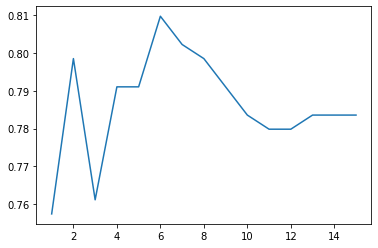

In [55]:
leaves= {}
xl, yl = [], []
for leaf in range(1,16):
    clf = DecisionTreeClassifier(random_state=42, min_samples_leaf = leaf)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    leaves[leaf] = accuracy_score(y_test,y_pred)
    xl.append(leaf)
    yl.append(accuracy_score(y_test,y_pred))

#MIN SAMPLE LEAF 6
print(leaves)
plt.plot(xl,yl)
plt.show()

{1: 0.7910447761194029, 2: 0.7723880597014925, 3: 0.8097014925373134, 4: 0.7910447761194029, 5: 0.7910447761194029, 6: 0.8059701492537313, 7: 0.8097014925373134, 8: 0.8097014925373134, 9: 0.8097014925373134, 10: 0.8097014925373134, 11: 0.8097014925373134, 12: 0.8097014925373134, 13: 0.8097014925373134, 14: 0.8097014925373134, 15: 0.8097014925373134, 16: 0.8097014925373134, 17: 0.8097014925373134, 18: 0.8097014925373134, 19: 0.8097014925373134}


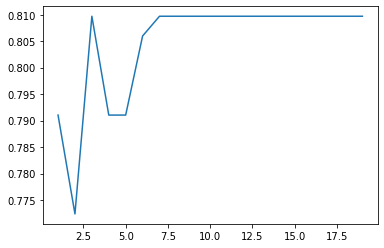

In [56]:
depths= {}
xd, yd = [], []
for depth in range(1,20):
    clf = DecisionTreeClassifier(random_state=42, min_samples_leaf = 6, max_depth=depth)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    depths[depth] = accuracy_score(y_test,y_pred)
    xd.append(depth)
    yd.append(accuracy_score(y_test,y_pred))

#DEPTH 3 FOR OPTIMAL
print(depths)
plt.plot(xd,yd)
plt.show()

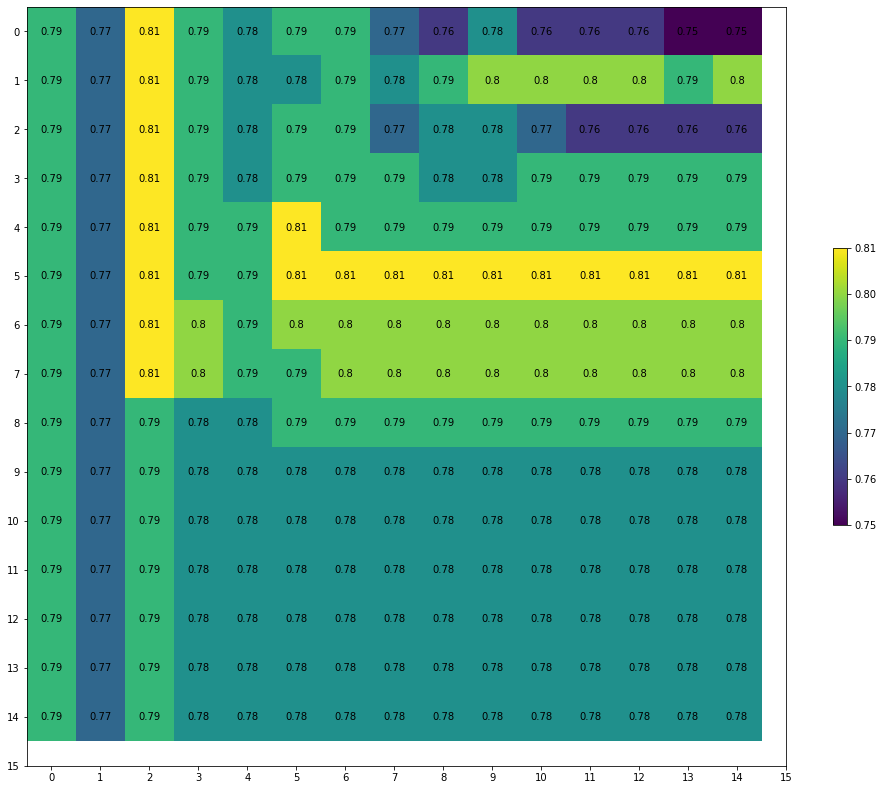

In [57]:
matriz = []
for leaf in range(1,16):
    row = []
    for depth in range(1,16):
        clf = DecisionTreeClassifier(random_state=42, min_samples_leaf = leaf, max_depth = depth)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        row.append(accuracy_score(y_test,y_pred))
    matriz.append(row)

matriz = np.matrix.round(np.array(matriz).reshape(15,15),2)
fig, ax = plt.subplots()
im = ax.imshow(matriz, origin='upper',)

ax.set_yticks(range(16))
ax.set_xticks(range(16))

fig.set_size_inches(17, 17) # setting figure size

# colorbar
cbar = fig.colorbar(im, shrink=0.3) # shrink parameter to adjust the size of colorbar 

for (j,i),label in np.ndenumerate(matriz):
    ax.text(i,j,label,ha='center',va='center')

In [58]:
param_grid = [
  {'max_depth': range(1,15), 'min_sample_leaf': range(1,15)}
 ]

Sabiendo nuestros hiperparametros optimos, podemos volver a fittear el modelo y proceder con las predicciones

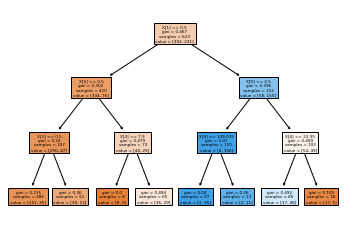

In [59]:
#FINAL MODEL
survivedOrNot = DecisionTreeClassifier(random_state=42, min_samples_leaf = 6, max_depth=3)
survivedOrNot.fit(x_train, y_train)

tree.plot_tree(survivedOrNot,filled=True)
plt.show()

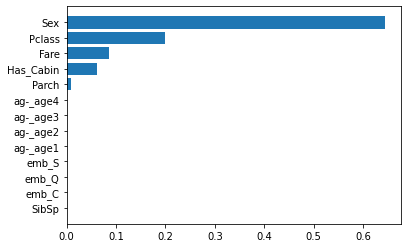

In [60]:
importances = survivedOrNot.feature_importances_
indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

# Hacer predicciones y exportar en csv para subirlo a Kaggle.

Tenemos edades vacías incluso en el test.

Exportamos las predicciones en un Excel y nos preparamos para entregar a Kaggle.

In [61]:
forTestModelx = test.drop(['PassengerId','Survived'],axis=1)

predictions = survivedOrNot.predict(forTestModelx)
predictDf = pd.DataFrame(predictions,columns=['Survived'])

finalCsv = pd.concat([test.drop(['Survived'],axis=1), predictDf], axis=1)
finalCsv.head(20)

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Has_Cabin,emb_C,emb_Q,emb_S,ag-_age1,ag-_age2,ag-_age3,ag-_age4,Survived
0,892,3,0,0,0,7.8292,0,0,1,0,0,0,1,0,0.0
1,893,3,1,1,0,7.0000,1,0,0,1,0,0,0,1,1.0
2,894,2,0,0,0,9.6875,0,0,1,0,0,0,0,1,0.0
3,895,3,0,0,0,8.6625,1,0,0,1,0,1,0,0,0.0
4,896,3,1,1,1,12.2875,0,0,0,1,0,1,0,0,1.0
5,897,3,0,0,0,9.2250,0,0,0,1,0,1,0,0,0.0
6,898,3,1,0,0,7.6292,1,0,1,0,0,0,1,0,1.0
7,899,2,0,1,1,29.0000,0,0,0,1,0,1,0,0,0.0
8,900,3,1,0,0,7.2292,0,1,0,0,0,1,0,0,1.0
9,901,3,0,2,0,24.1500,0,0,0,1,0,1,0,0,0.0


In [62]:
finalCsv['Survived'] = finalCsv['Survived'].astype(int)
finalCsv[['PassengerId','Survived']].to_csv('export.csv',index=False)
files.download('export.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Kaggle 

Preparamos predicciones y subimos a Kaggle


Enviamos la de todos nuestros modelos que comparamos


Nuestro modelo final es el que tiene mejor score 77.990% de precisión.
